In [1]:
# Imports

import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from models import resnet

from skimage.io import imread, imsave
from skimage.util import img_as_float


import dataset
import utils
import train

In [2]:
net = resnet.ResNet(32, 128)
net = net.cuda()
net.eval()


def save_model(filename):
    torch.save(net.state_dict(), 'checkpoints/' + filename)
    
def load_model(filename):
    net.load_state_dict(torch.load(filename))


In [3]:
checkpoint = 'checkpoints/2_1.bin'

load_model(checkpoint)

In [4]:
def test_img(filename):
    img = imread(filename)
    hr = img.copy()
    img = utils.preprocess_image(img)
    img = np.expand_dims(img, 0)
    img = img.astype(np.float32)
    x = torch.from_numpy(img).cuda()
    x = Variable(x, volatile=True, requires_grad=False)
    y = net(x)
    y = y.data[0]
    y = y.cpu().numpy()
    y = utils.restore_image(y)
    y = np.clip(y,0,1)
    
    utils.show_images([hr, y])
    return y

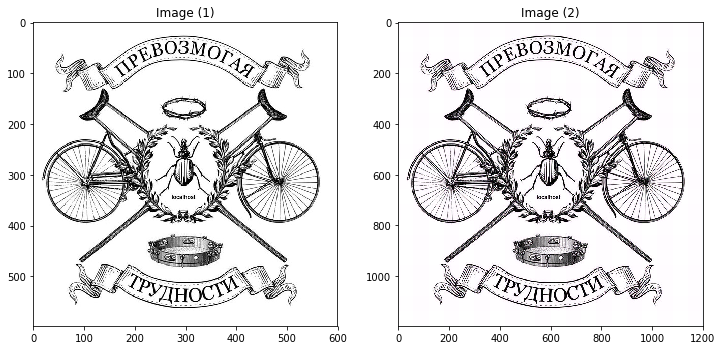

In [11]:
y = test_img('tests/6.png')

In [12]:
imsave('res.png', y)

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
